### Data mining

In [1]:
import pandas as pd
import thinkplot
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

Read in data

In [2]:
df_raw = pd.read_csv('../Data/usa_00002.csv')
df_raw.head()

,YEAR,DATANUM,SERIAL,CBSERIAL,HHWT,REGION,STATEICP,STATEFIP,COUNTYICP,COUNTYFIP,...,DIFFHEAR,PWSTATE2,PWCOUNTY,PWMET13,PWTYPE,PWPUMA00,TRANWORK,TRANTIME,DEPARTS,ARRIVES
0,2017,1,1,2017000000016,206,32,41,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2017,1,2,2017000000031,45,32,41,1,0,0,...,1,1,117,13820,5,1200,10,50,642,734
2,2017,1,3,2017000000061,136,32,41,1,0,0,...,1,13,0,0,5,1700,10,45,1805,1849
3,2017,1,3,2017000000061,136,32,41,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2017,1,3,2017000000061,136,32,41,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [3]:
work_force = df_raw[df_raw.EMPSTAT == 1] # Consider all employed people

Remove NaNs

In [4]:
work_force = work_force.dropna()
work_force.head()

,YEAR,DATANUM,SERIAL,CBSERIAL,HHWT,REGION,STATEICP,STATEFIP,COUNTYICP,COUNTYFIP,...,DIFFHEAR,PWSTATE2,PWCOUNTY,PWMET13,PWTYPE,PWPUMA00,TRANWORK,TRANTIME,DEPARTS,ARRIVES
1,2017,1,2,2017000000031,45,32,41,1,0,0,...,1,1,117,13820,5,1200,10,50,642,734
2,2017,1,3,2017000000061,136,32,41,1,0,0,...,1,13,0,0,5,1700,10,45,1805,1849
5,2017,1,4,2017000000158,19,32,41,1,0,0,...,1,1,0,0,9,2500,10,25,717,744
10,2017,1,5,2017000000159,21,32,41,1,0,0,...,1,1,0,0,9,290,10,60,602,704
11,2017,1,5,2017000000159,21,32,41,1,0,0,...,1,1,0,0,9,290,10,85,702,829


Recode `SEX` to be 0 for female and 1 for male.

In [5]:
work_force['SEX'].replace(2, 0, inplace=True)
work_force['SEX'].value_counts()

1    775971
0    713015
Name: SEX, dtype: int64

Find hourly income using `UHRSWORK`, Usual hours worked per week, and `WKSWORK2`, Weeks worked last year (intervalled).

In [6]:
work_force = work_force[work_force['UHRSWORK'] >= 30] # Usual hours worked per week
work_force = work_force[work_force['WKSWORK2'] >= 3] # Weeks worked last year (level)

In [7]:
work_force['UHRSWORK'].replace([0], np.nan, inplace=True)
work_force['WKSWORK'] = work_force['WKSWORK2'].replace([0, 1, 2, 3, 4, 5, 6], [np.nan, 7, 20, 33, 43.5, 48.5, 51.5], inplace=False)
work_force['INCWAGE'].replace([0, 999999, 999998], np.nan, inplace=True)

In [8]:
work_force['HRLY_INCWAGE'] = work_force['INCWAGE']/(work_force['UHRSWORK'] * work_force['WKSWORK'])
work_force = work_force[work_force['HRLY_INCWAGE'] > 2] # Only consider those who earn > $2.0 hourly

In [9]:
work_force = work_force.dropna()

In [10]:
work_force['INCWAGE'].head()

1     38500.0
2     72000.0
5     18000.0
10    65000.0
11    57000.0
Name: INCWAGE, dtype: float64

In [11]:
work_force['WKSWORK'].head()

1     51.5
2     51.5
5     51.5
10    51.5
11    51.5
Name: WKSWORK, dtype: float64

In [12]:
work_force['UHRSWORK'].head()

1     42
2     42
5     30
10    60
11    40
Name: UHRSWORK, dtype: int64

In [13]:
work_force.sort_values(by='HRLY_INCWAGE')['OCC2010']

2179079     205
3141557    8800
81444      4610
1771293    1540
923106     2340
2176515    4720
2556883    5840
2172747    4720
2010786    4220
2172186    4720
1670484    4920
2174157    4720
1136170    7160
1994996    5620
2596774    5120
2283003    4110
1909363    4760
500832     2540
500833     2540
500834     2550
500831     2540
500835     2550
500830     2540
2403396    4220
1374177    2310
2942099    9520
2723978     160
187239     4700
2170841    2310
2379272    2310
           ... 
1972277     120
2461464    1460
1914539    2310
2022459    8920
1901036    3930
1390200    4650
2612152     710
1386982    9350
794572      430
668576     6100
662701     6100
1994617    4820
1916036     850
1768618      10
3037439    9030
2052585     850
1561575      10
2726631    3060
2033943     430
1919461    3050
1969768     430
2045336    4920
1949625     850
426781      730
558284     4230
582475     3250
615429       10
607511     2630
1419433    3060
606789     2700
Name: OCC2010, Length: 1

In [14]:
work_force[work_force.index == 2179079]['INCEARN']

2179079    13000
Name: INCEARN, dtype: int64

In [15]:
work_force[work_force.index == 2179079]['WKSWORK']

2179079    51.5
Name: WKSWORK, dtype: float64

In [16]:
work_force[work_force.index == 2179079]['UHRSWORK']

2179079    63
Name: UHRSWORK, dtype: int64

### Predictive powers

#### Find variables that impact income the most

In [17]:
t = []
for name in work_force.columns:
    try:
        if work_force[name].var() < 1e-7:
            continue
        
        formula = 'HRLY_INCWAGE ~ ' + name
        model = smf.ols(formula, data=work_force)
        if model.nobs < len(work_force)/2:
            print(model.nobs)
            continue
            
        results = model.fit()
    except (ValueError, TypeError):
        continue
        
    t.append((results.rsquared, name))

In [18]:
t.sort(reverse=True)
for r2, name in t[:-1]:
    print(name, r2)

HRLY_INCWAGE 1.0
INCWAGE 0.9261158455252794
INCEARN 0.8927107330775691
INCTOT 0.8495088621906091
OCCSCORE 0.1520339445083454
EDUCD 0.12075577248421288
EDUC 0.11627210702436874
SEI 0.1152736171769092
DEGFIELDD 0.09515682922954627
DEGFIELD 0.0951023297375887
OCC2010 0.07549323581942147
OCC 0.07538915145576164
OCC1950 0.07087941231161066
MARST 0.03760606125612209
AGE 0.033228751535220535
BIRTHYR 0.0332287515352202
YRMARR 0.029945658063642355
RELATE 0.020329427202418704
RELATED 0.020216529162615182
PERNUM 0.01802316478406063
SEX 0.015630218428316134
PWTYPE 0.01251682703960788
FERTYR 0.011909862134879878
MET2013 0.011530645300390496
PWMET13 0.009299384416518786
METRO 0.008828651596018644
DEGFIELD2D 0.008376977217576798
DEGFIELD2 0.008376287625038503
UHRSWORK 0.00791208831388257
CLASSWKR 0.007129525815958382
ELDCH 0.006770865948471982
YNGCH 0.0065225018143909574
HISPAN 0.006148494141895777
HISPAND 0.00578237089485556
SCHOOL 0.005137271811117117
NCHILD 0.005116032233183243
TRANTIME 0.00479424

#### Income ~ variables

In [19]:
# Build formula
formula = 'HRLY_INCWAGE ~ '
ignores = ['HRLY_INCWAGE', 'SEX', 'UHRSWORK', 'WKSWORK2', 'WKSWORK', 'INCWAGE', 'INCEARN', 'INCTOT', 'OCCSCORE', 'SEI', 'SERIAL', 'CBSERIAL', 'GQ', 'PERNUM', 'PERWT', 'HHWT', 'RACE', 'HISPAN', 'EDUC', 'DEGFIELD2', 'EMPSTATD', 'HRLY_INCWAGE']
for i in range(len(work_force.columns)):
    name = work_force.columns[i]
    try:
        if work_force[name].var() < 1e-7 or name in ignores:
            continue

        formula += name + ' + '

    except (ValueError, TypeError):
        continue

In [20]:
formula = formula[:-3]
formula

'HRLY_INCWAGE ~ REGION + STATEICP + STATEFIP + COUNTYICP + COUNTYFIP + METRO + MET2013 + MET2013ERR + CITY + CITYERR + CITYPOP + PUMA + CPUMA0010 + HOMELAND + FARM + NFAMS + NCHILD + NCHLT5 + ELDCH + YNGCH + RELATE + RELATED + AGE + MARST + BIRTHYR + YRMARR + FERTYR + RACED + HISPAND + CITIZEN + YRSUSA1 + SPEAKENG + SCHOOL + EDUCD + GRADEATT + GRADEATTD + SCHLTYPE + DEGFIELD + DEGFIELDD + DEGFIELD2D + OCC + OCC1950 + OCC2010 + IND + IND1990 + CLASSWKR + CLASSWKRD + FTOTINC + VETDISAB + DIFFREM + DIFFPHYS + DIFFMOB + DIFFCARE + DIFFSENS + DIFFEYE + DIFFHEAR + PWSTATE2 + PWCOUNTY + PWMET13 + PWTYPE + PWPUMA00 + TRANWORK + TRANTIME + DEPARTS + ARRIVES'

In [21]:
model = smf.ols(formula, data=work_force)
results = model.fit()
results.rsquared

0.2299446344305689

#### Income ~ variables + sex

In [22]:
formula_sex = formula + ' + SEX'

In [23]:
model = smf.ols(formula_sex, data=work_force)
results = model.fit()
results.rsquared

0.2428834489710584

Men earns $10 more hourly than women on average.

In [24]:
results.params['SEX']

10.019635550855284

In [25]:
male = work_force[work_force['SEX'] == 1]
female = work_force[work_force['SEX'] == 0]

In [26]:
male['HRLY_INCWAGE'].mean() - female['HRLY_INCWAGE'].mean()

6.942175757895772

### Analysis into some variables

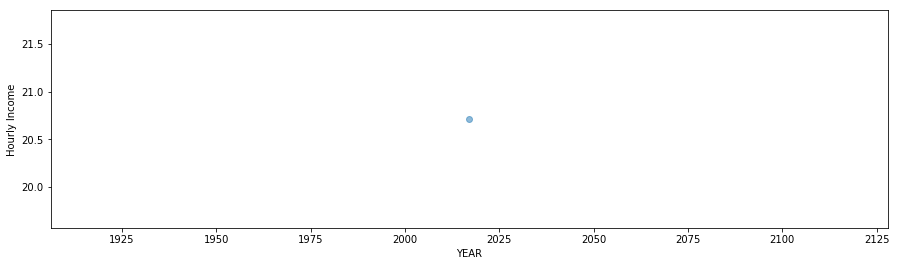

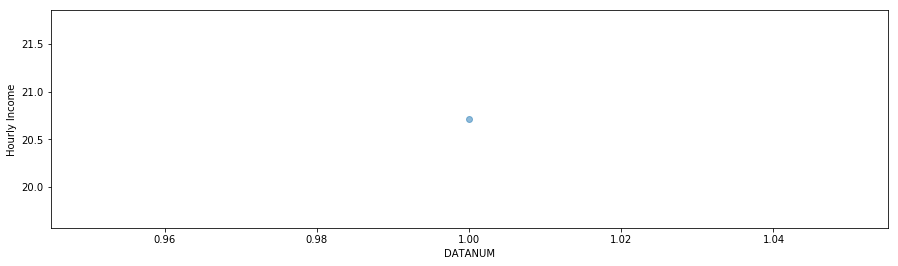

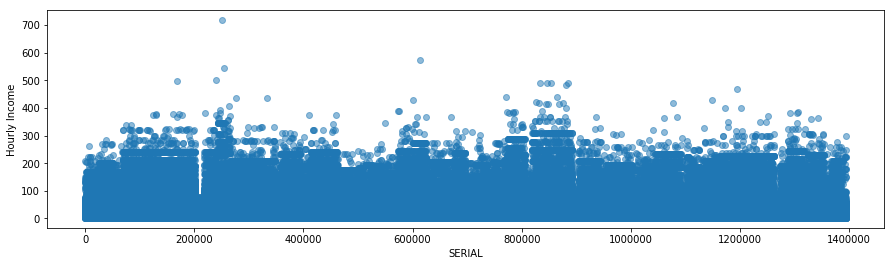

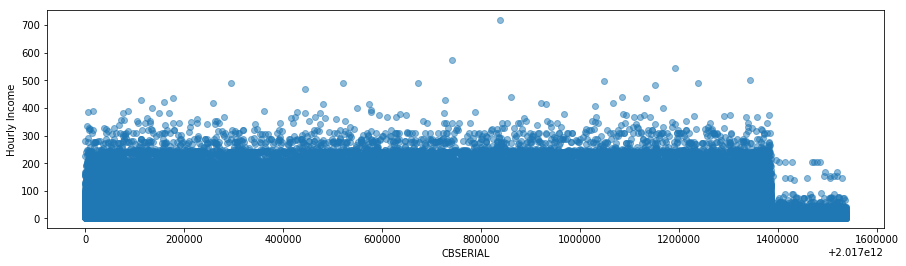

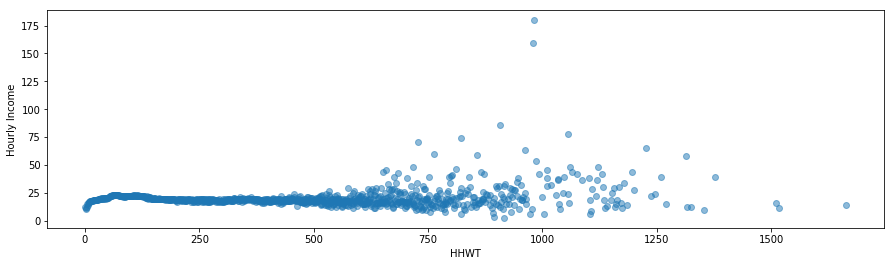

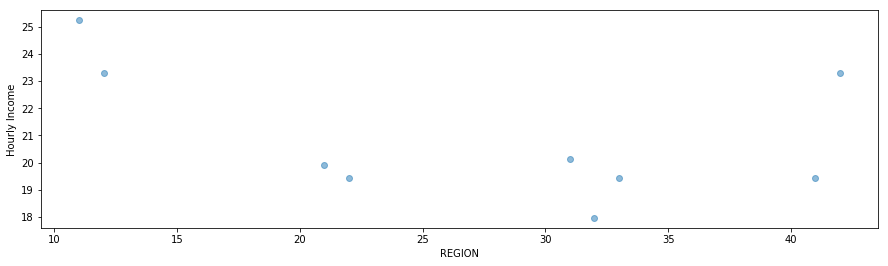

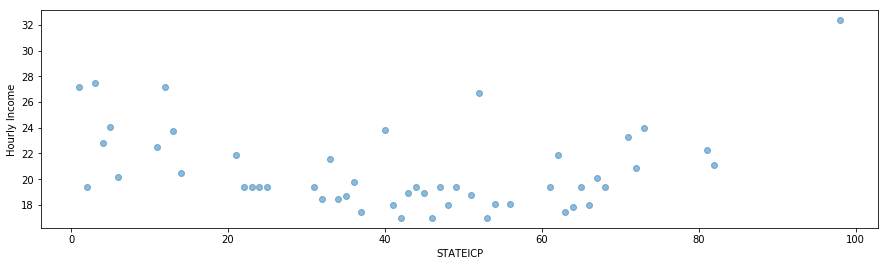

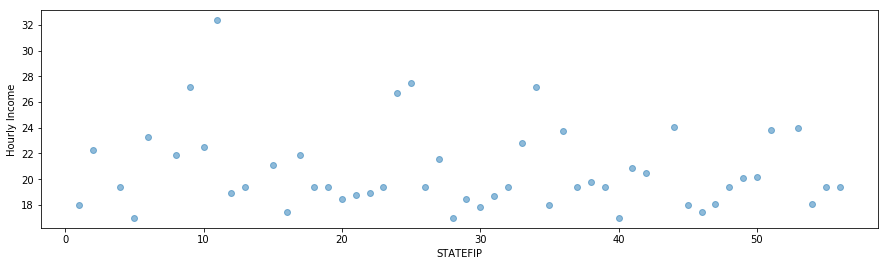

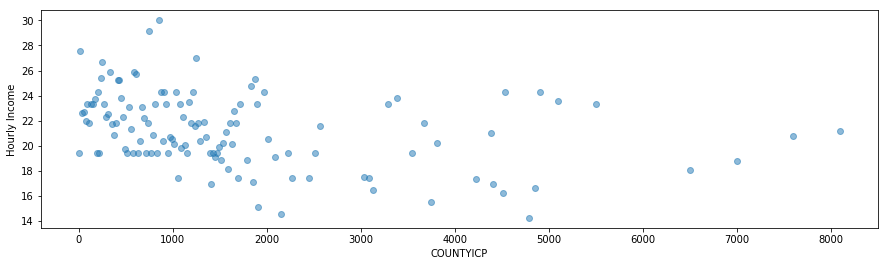

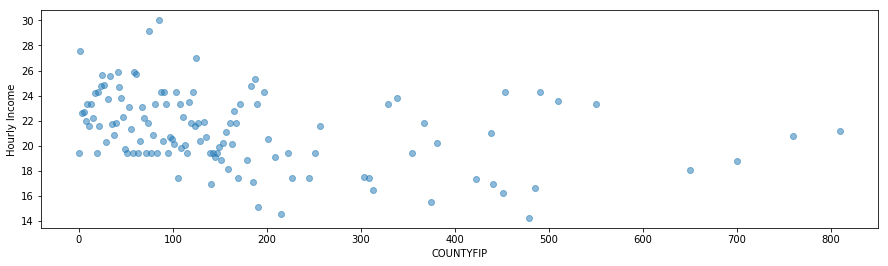

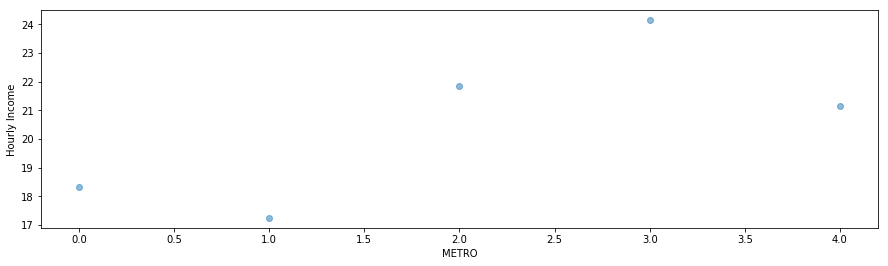

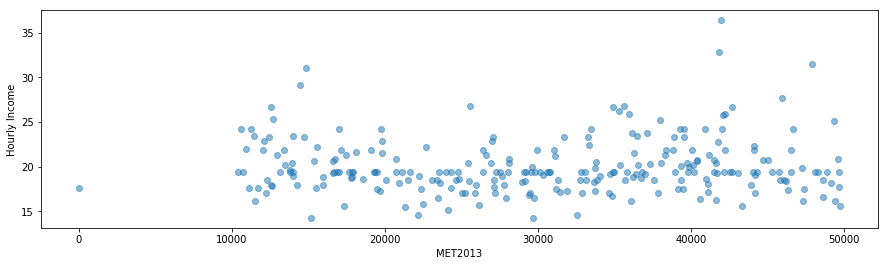

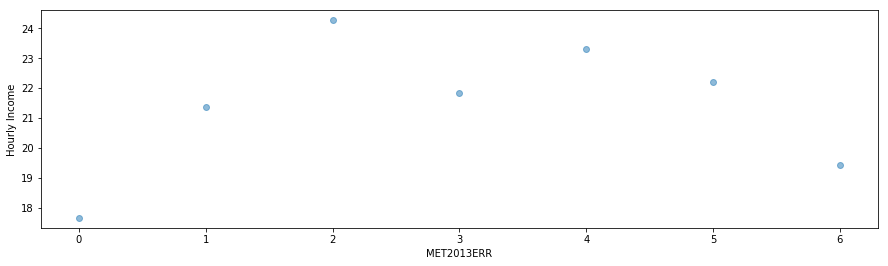

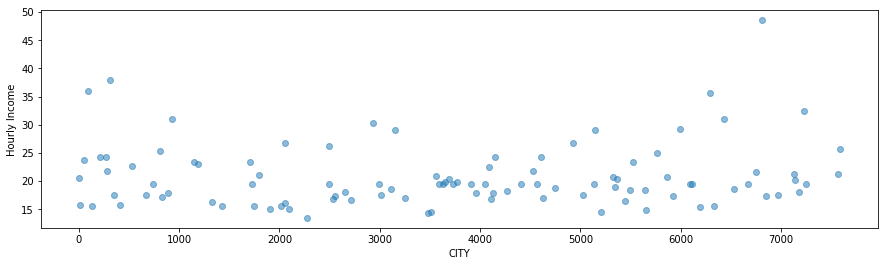

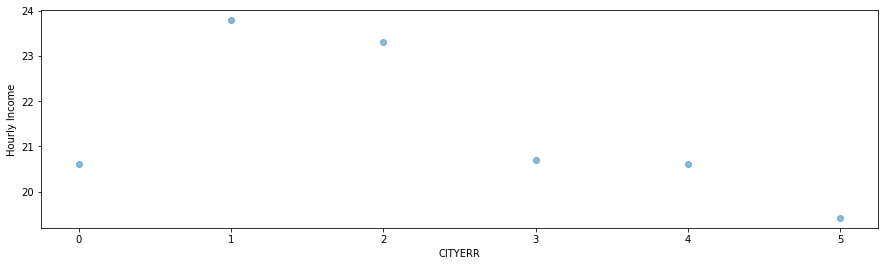

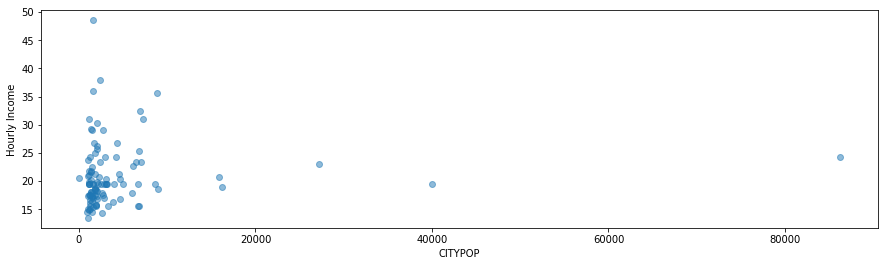

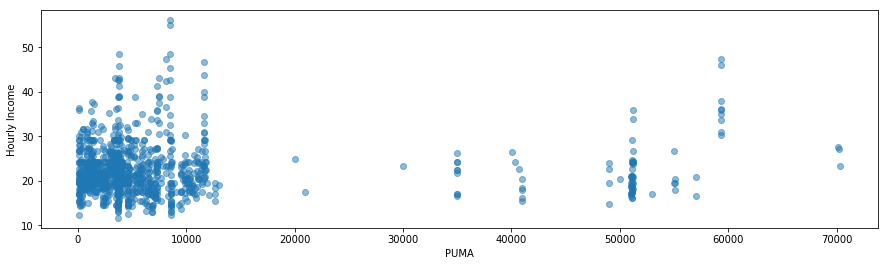

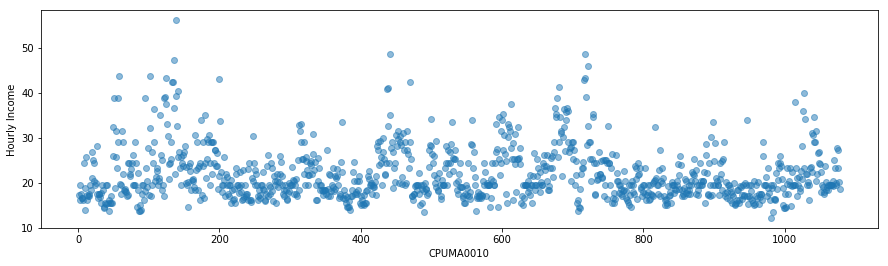

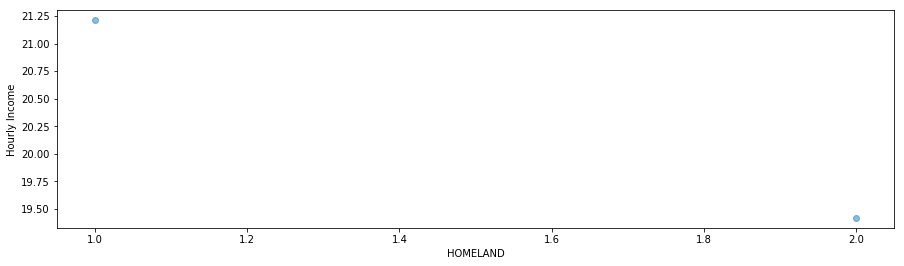

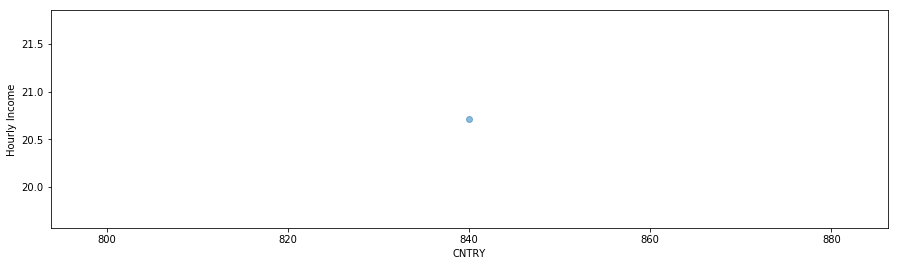

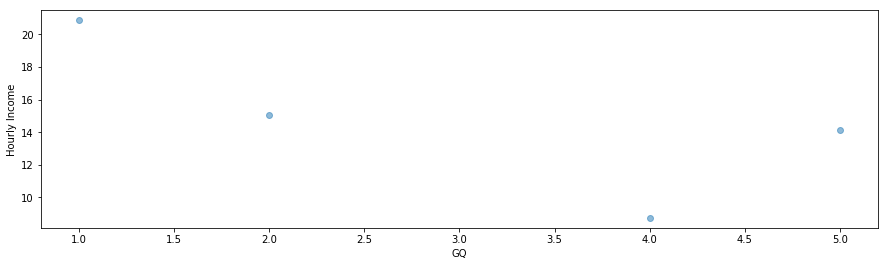

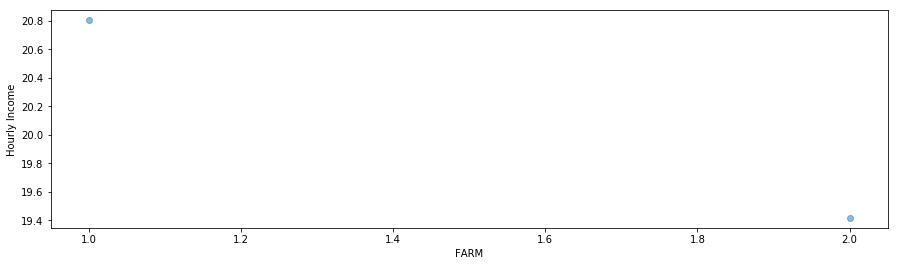

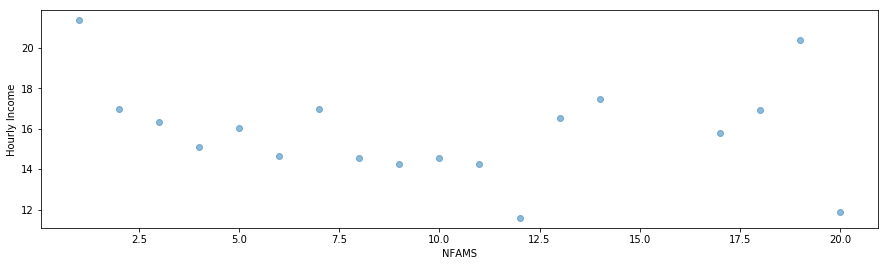

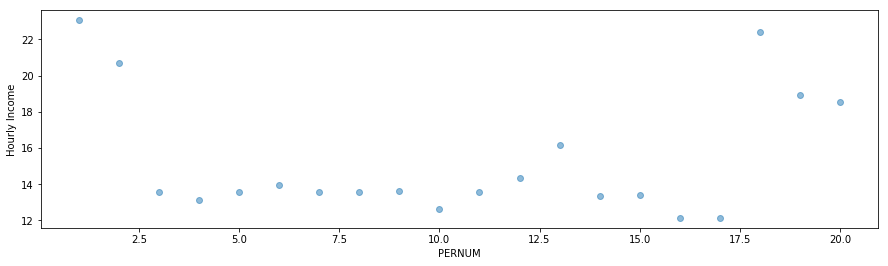

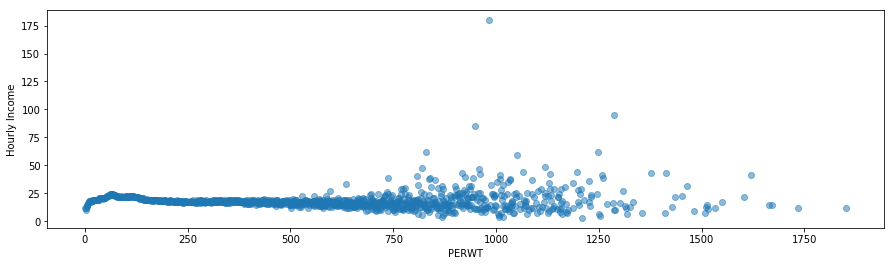

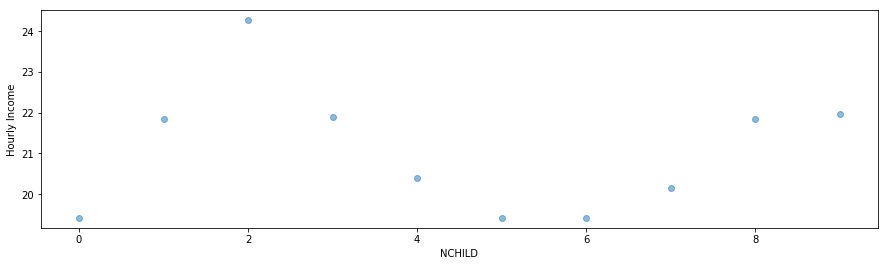

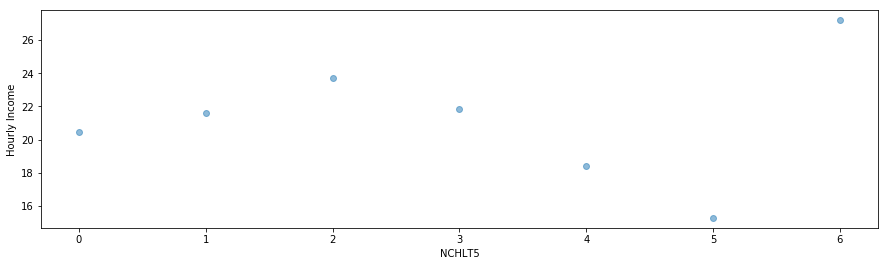

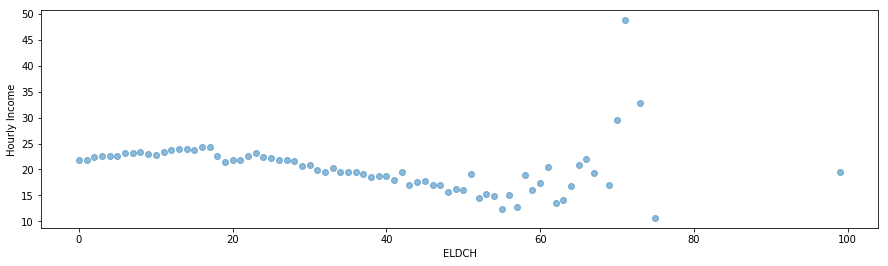

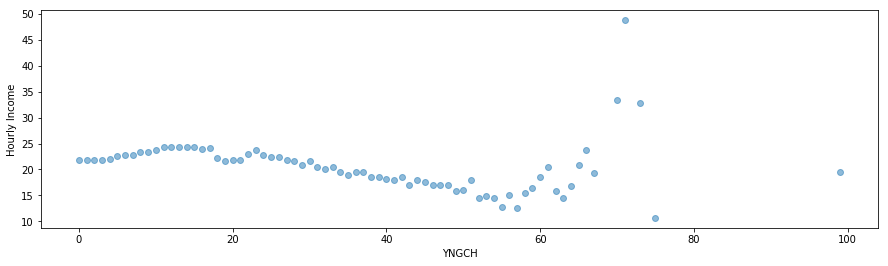

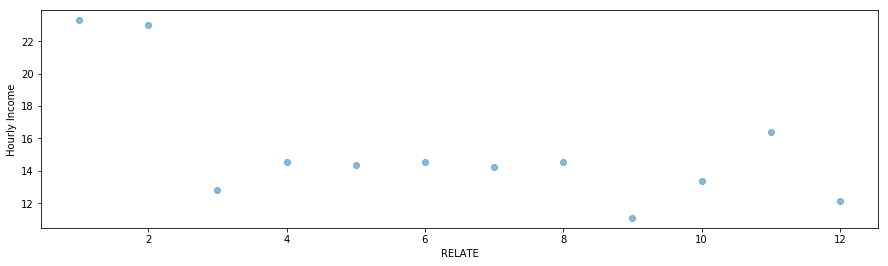

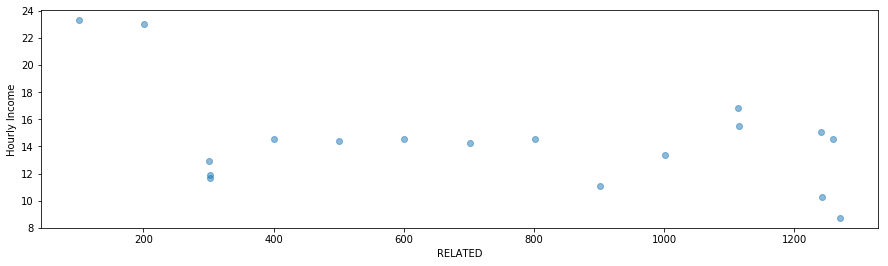

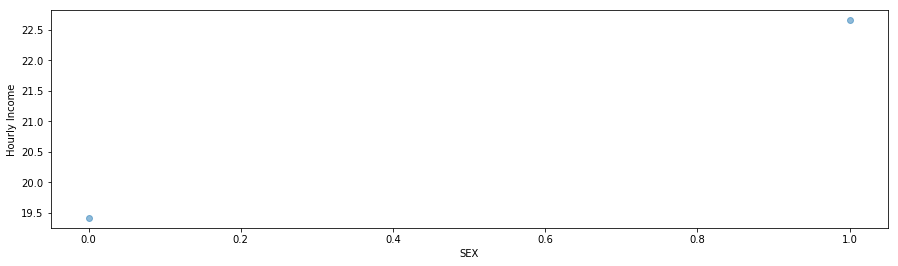

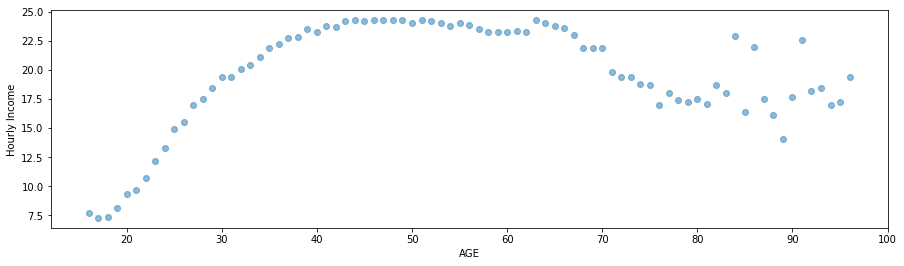

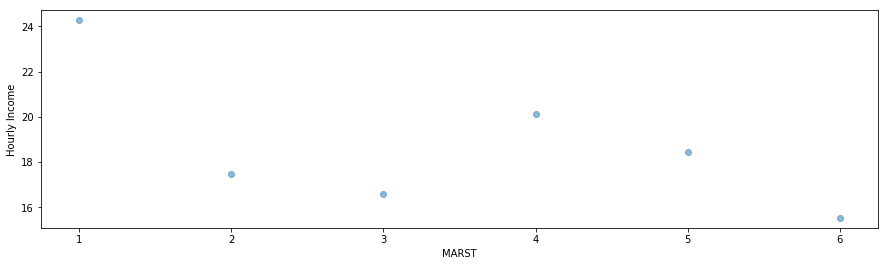

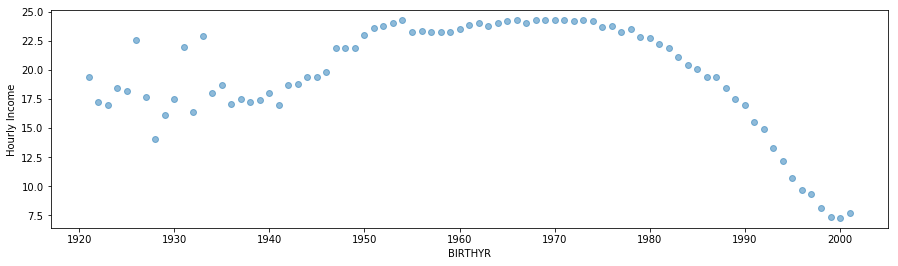

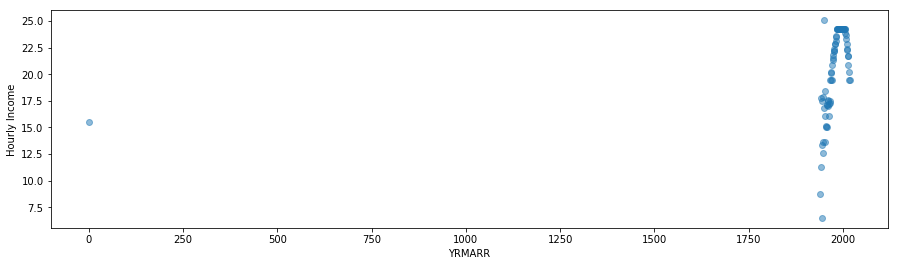

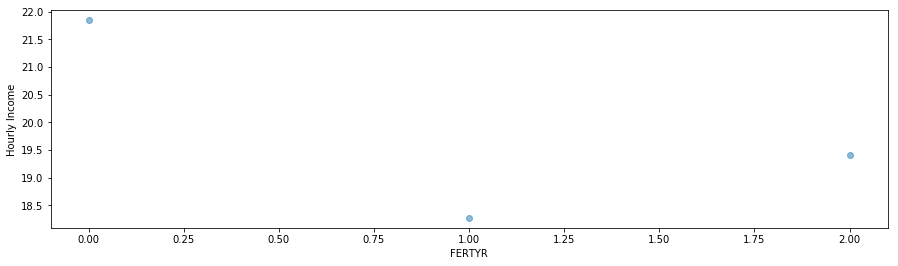

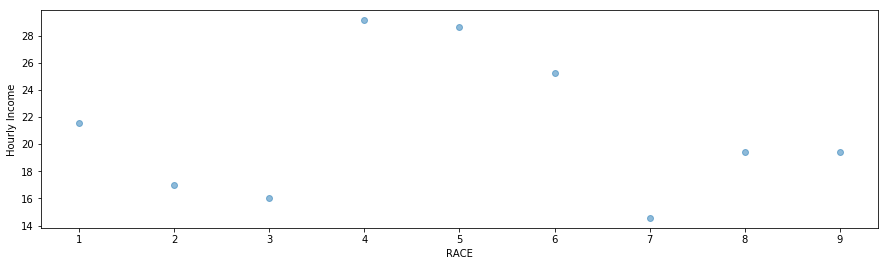

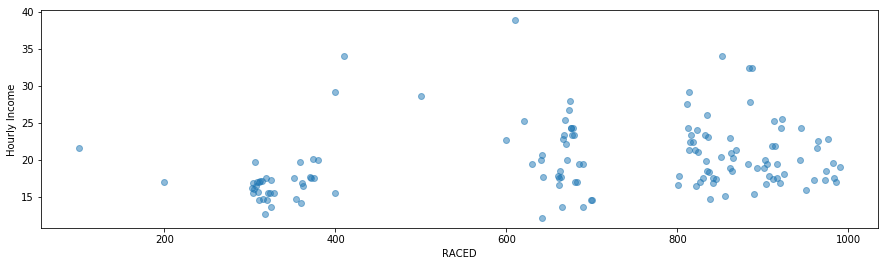

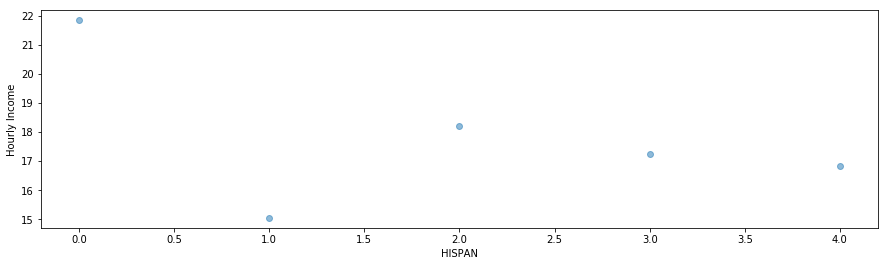

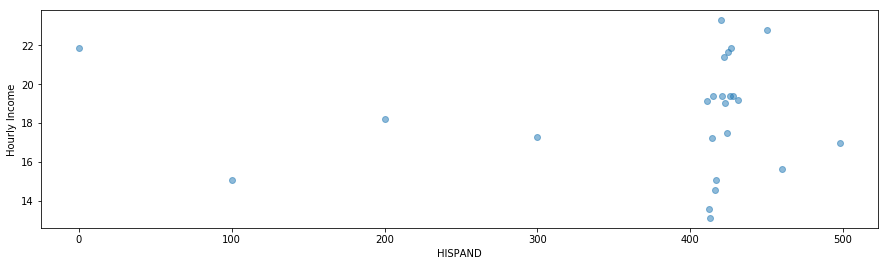

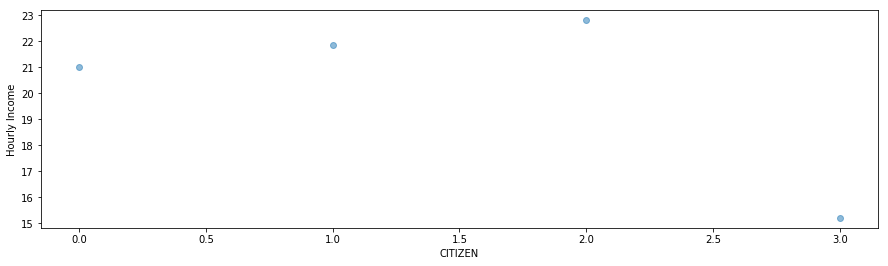

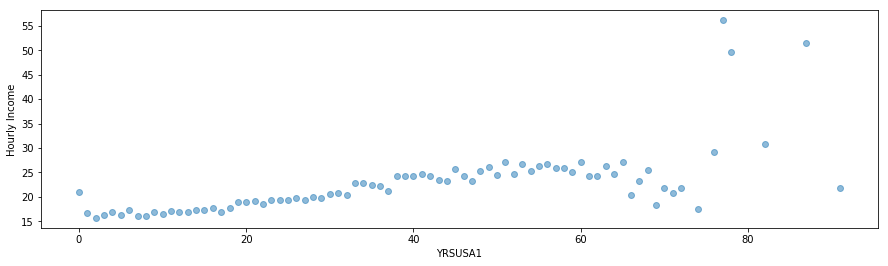

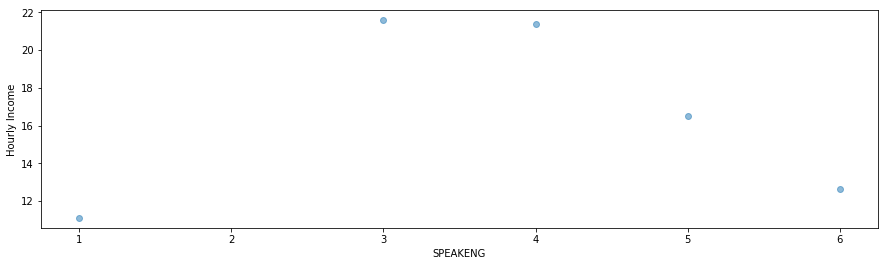

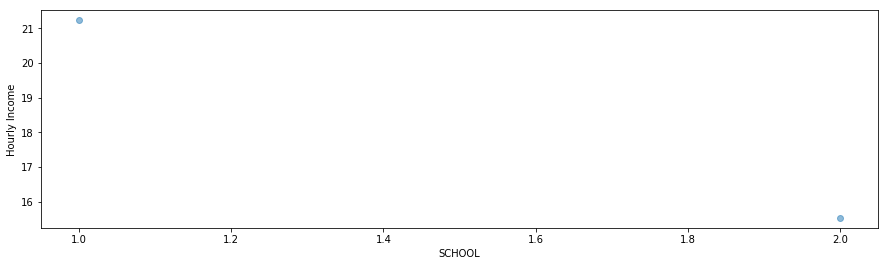

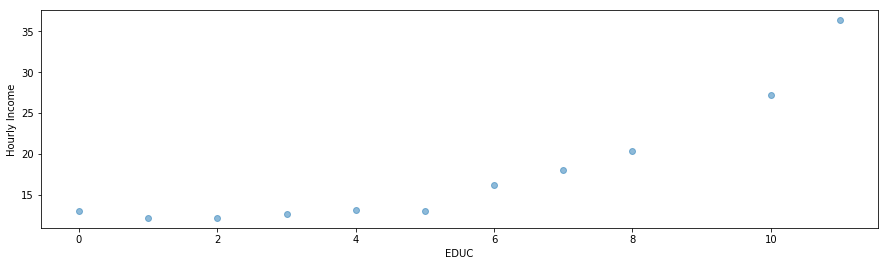

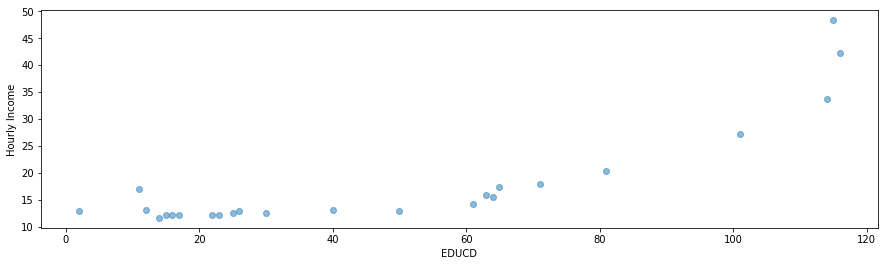

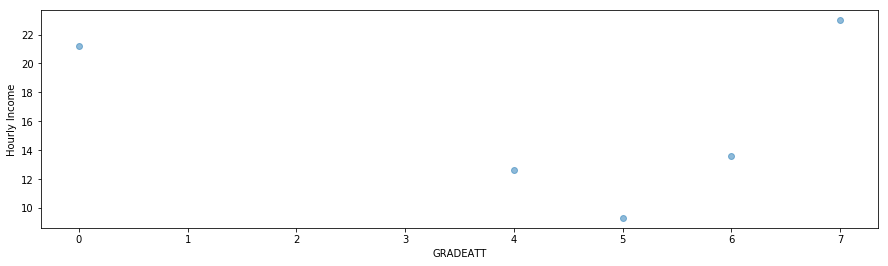

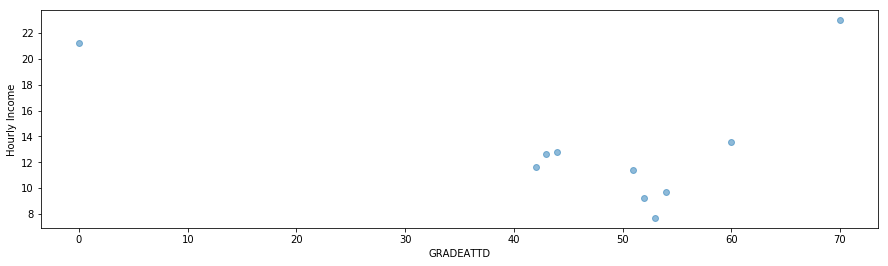

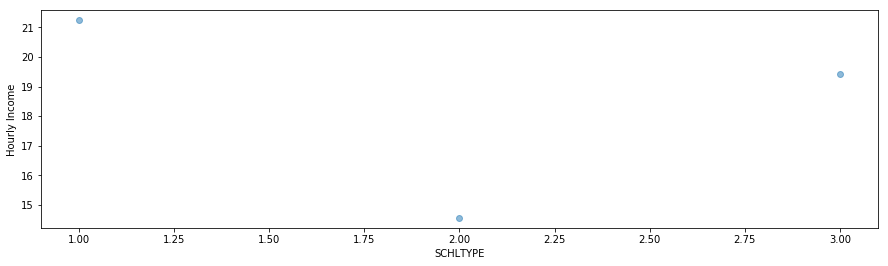

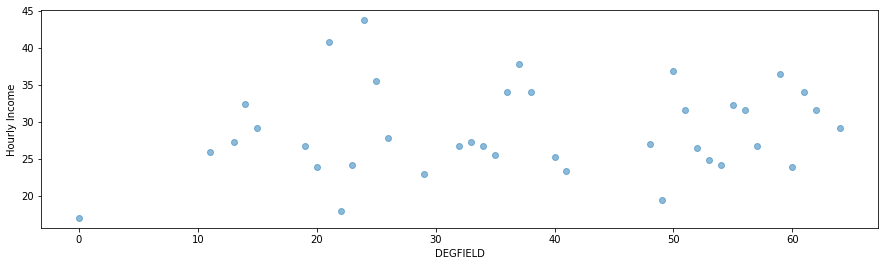

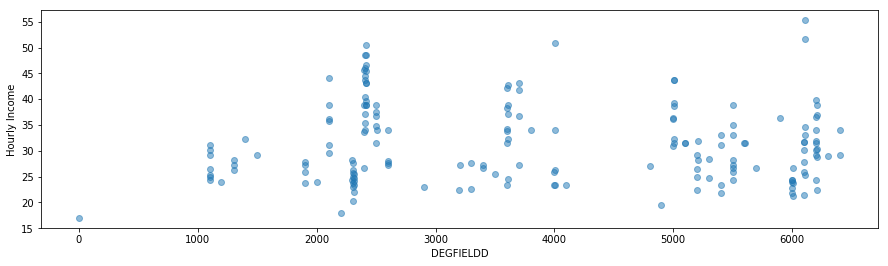

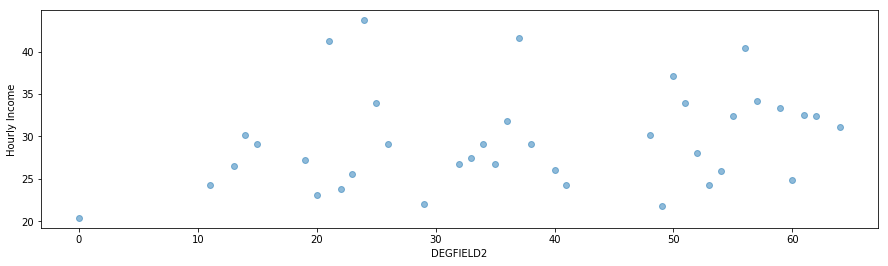

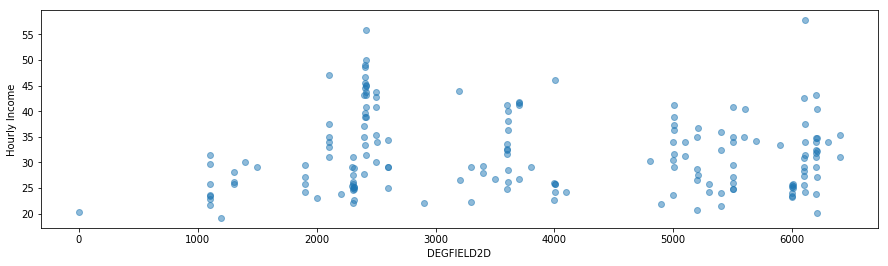

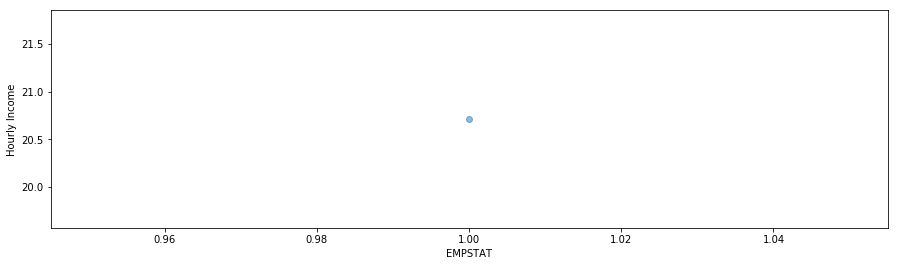

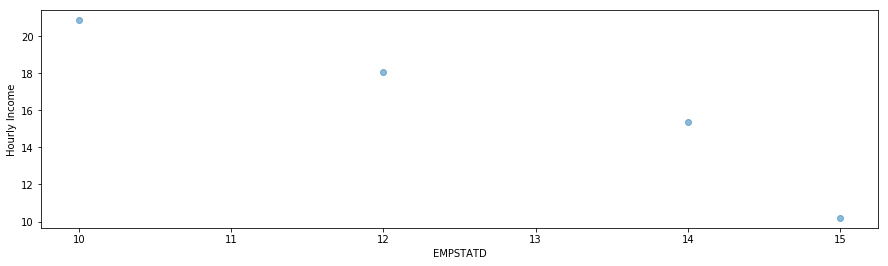

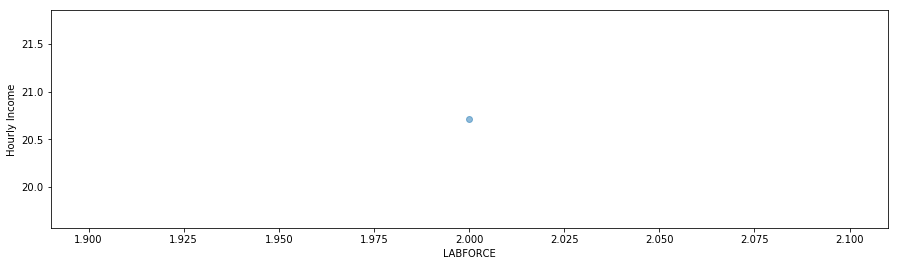

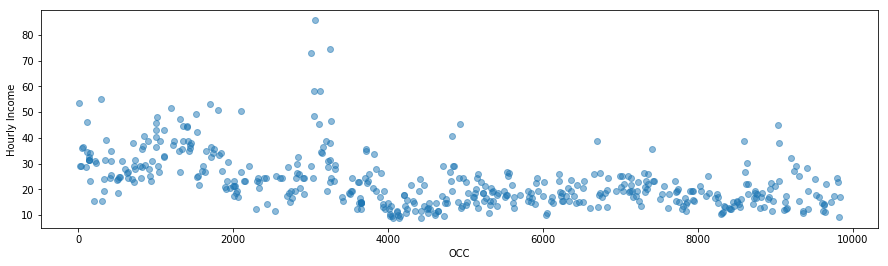

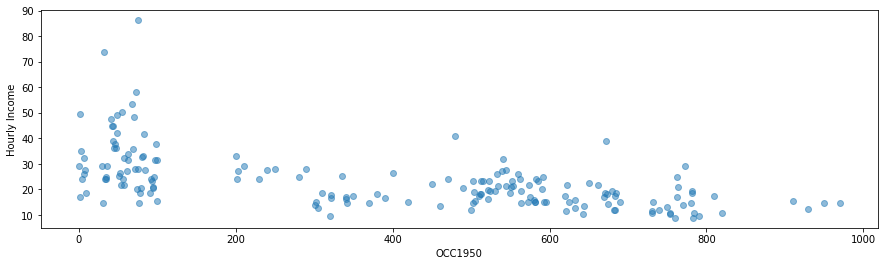

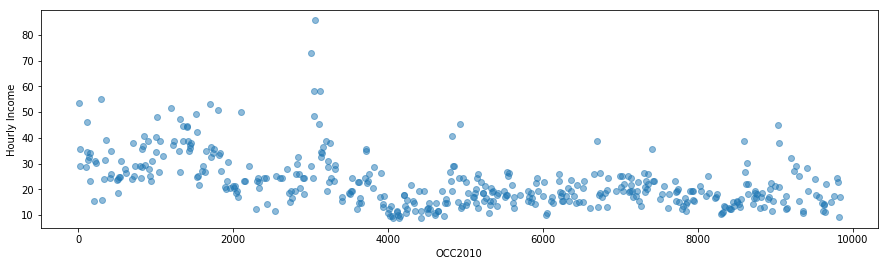

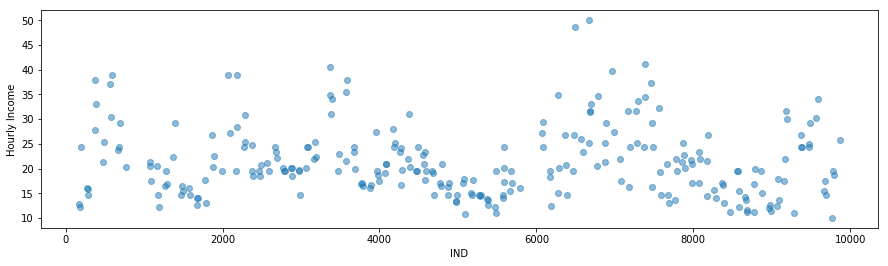

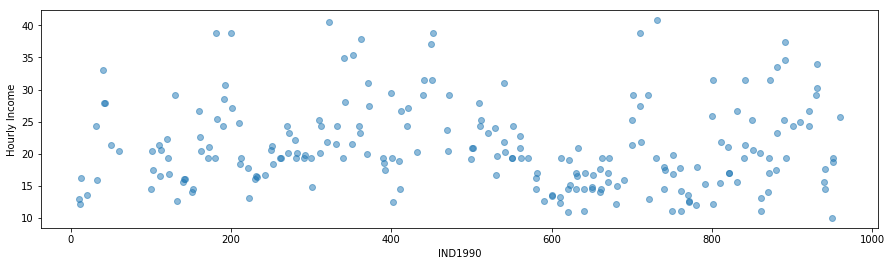

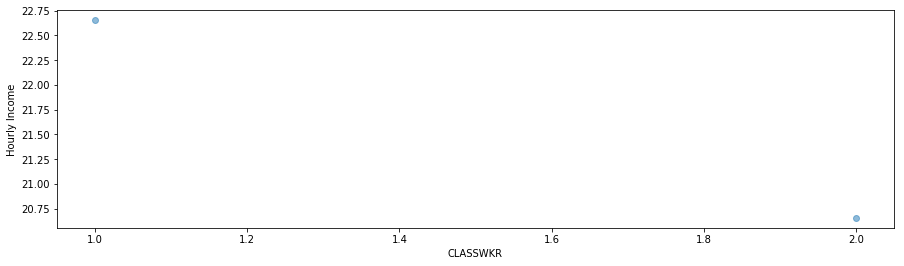

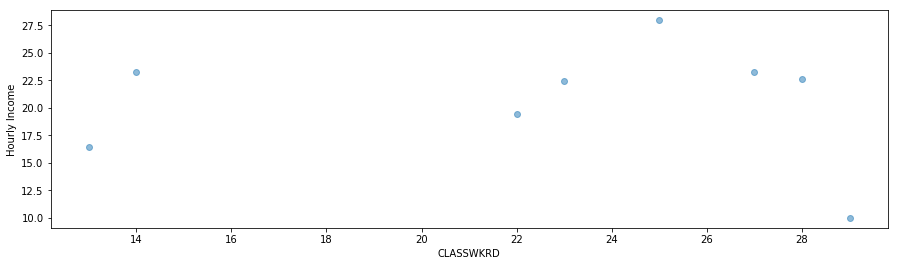

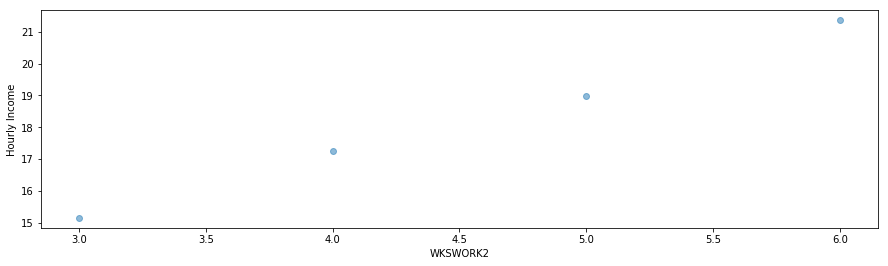

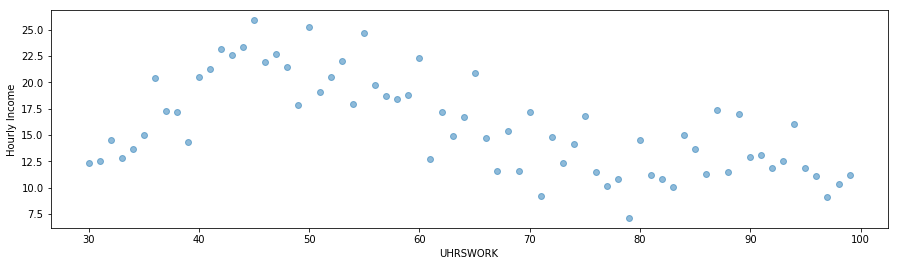

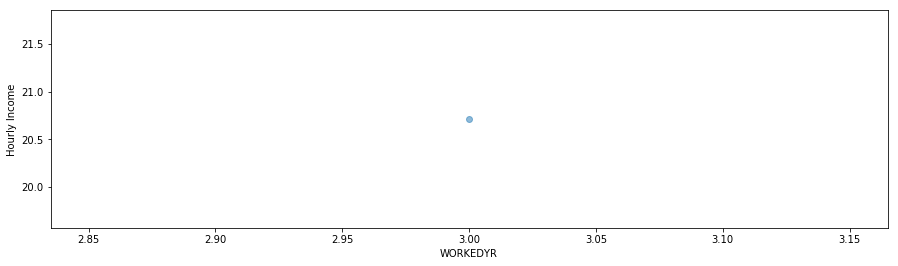

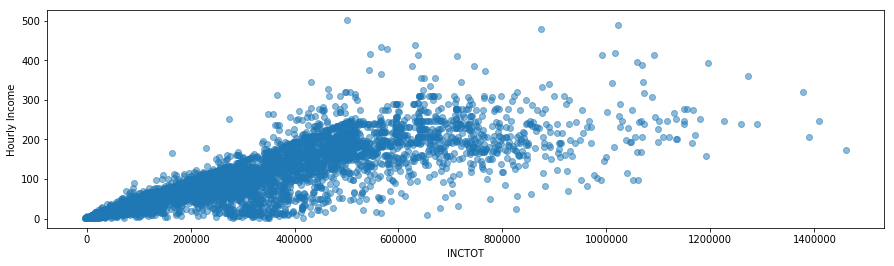

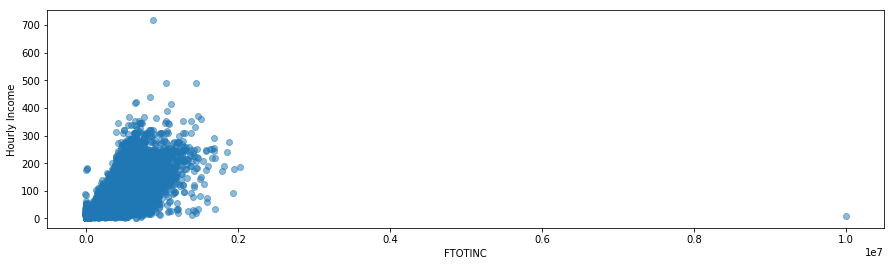

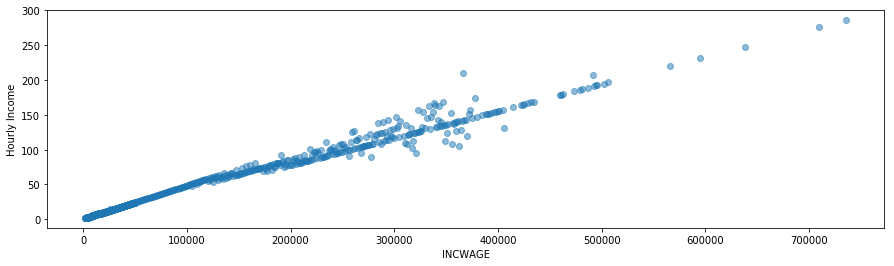

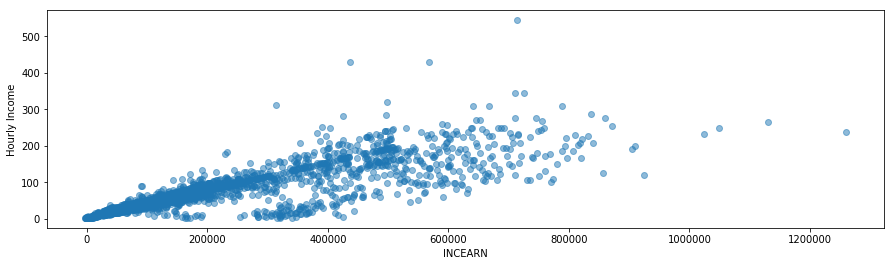

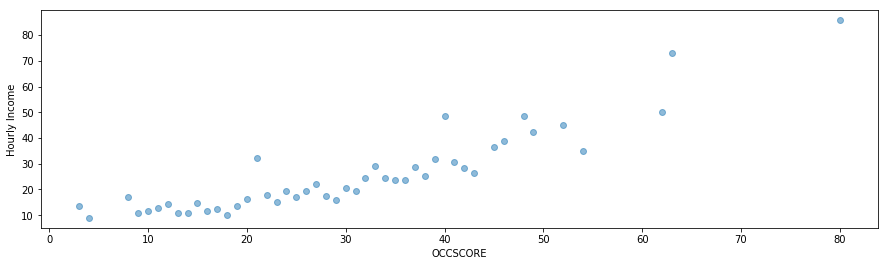

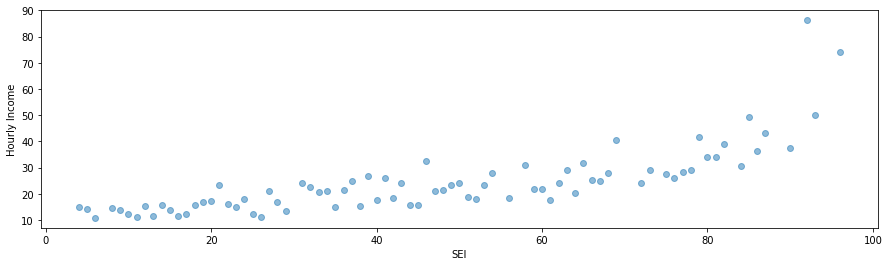

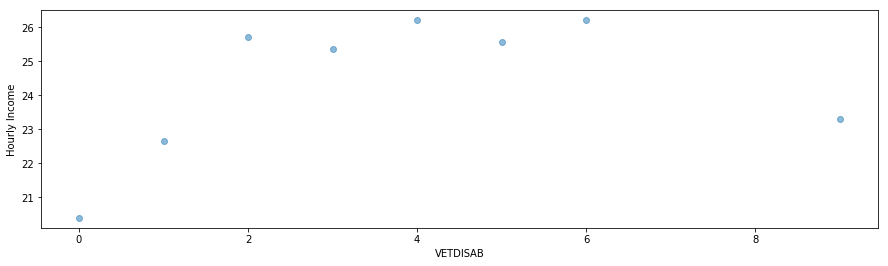

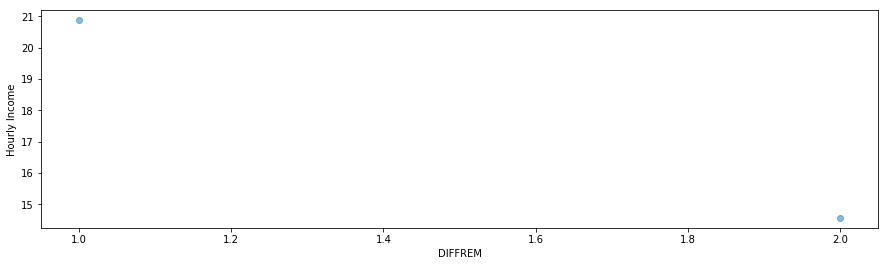

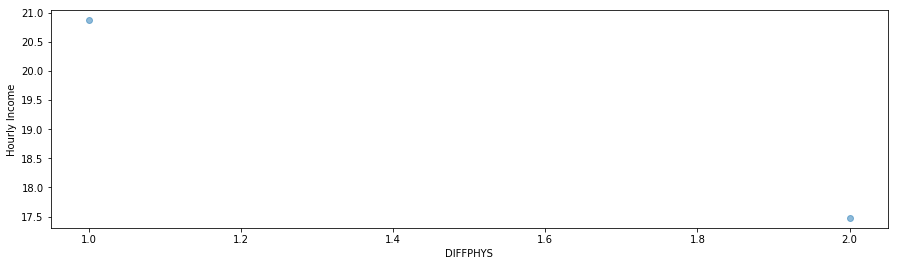

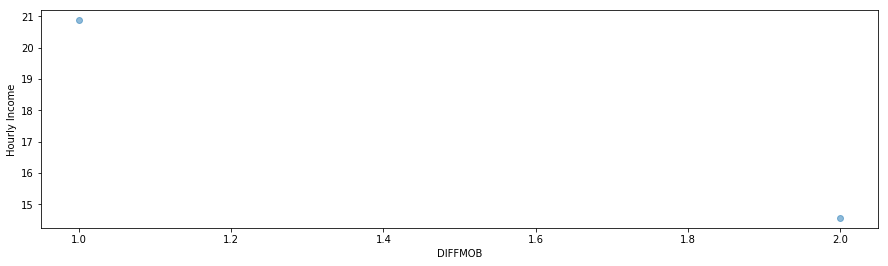

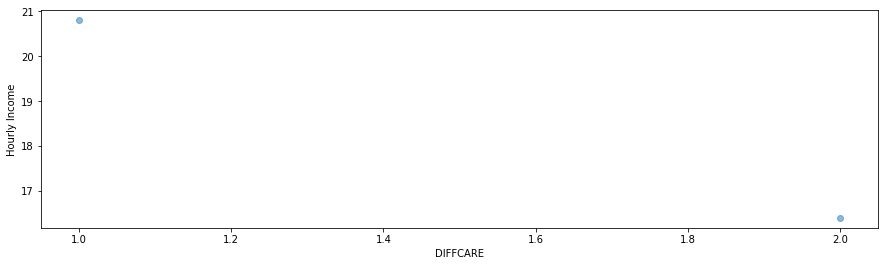

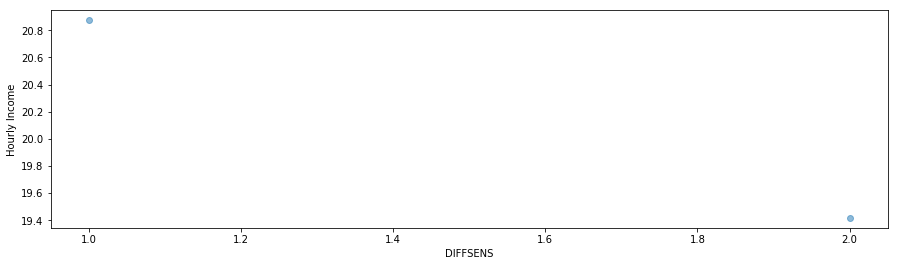

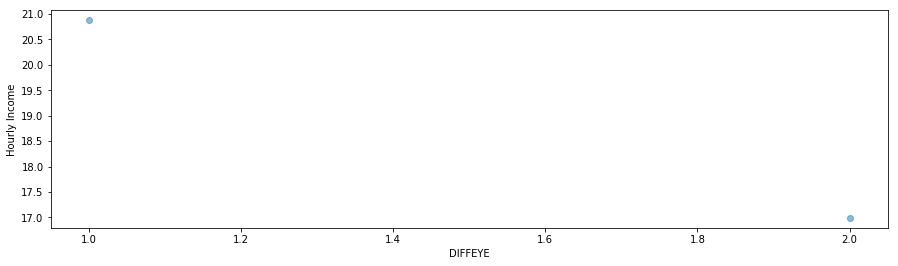

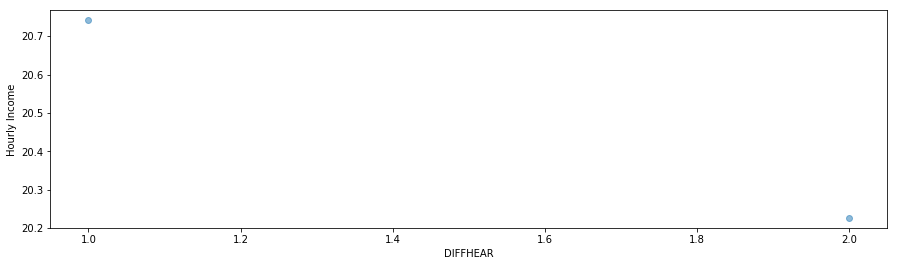

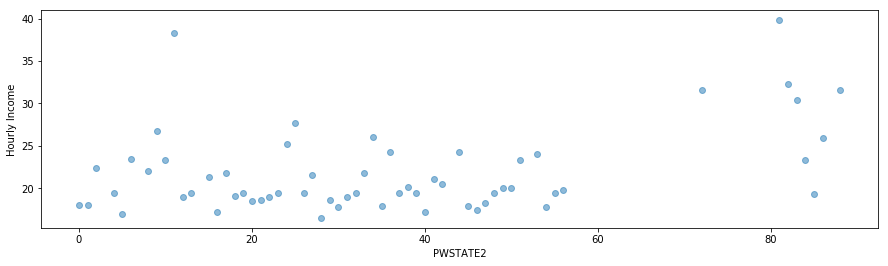

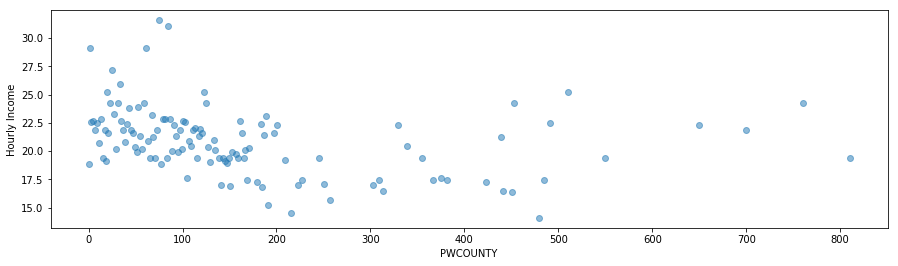

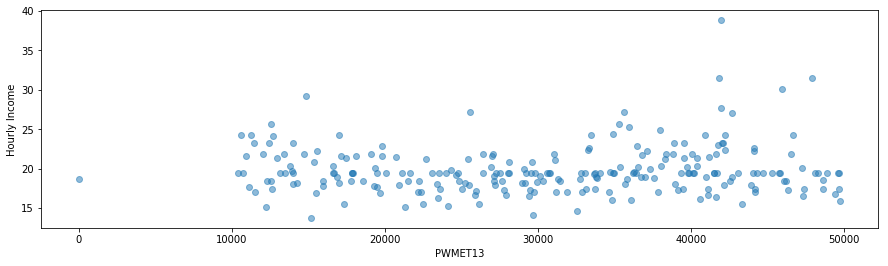

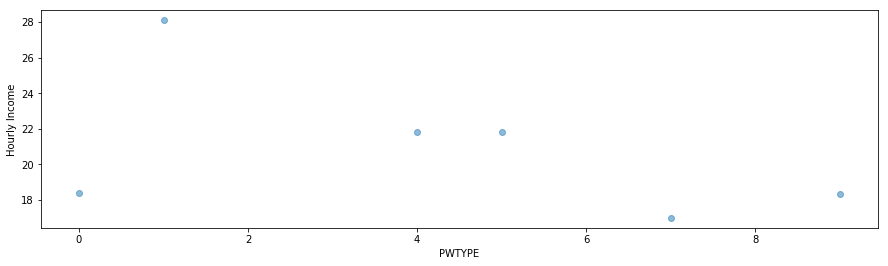

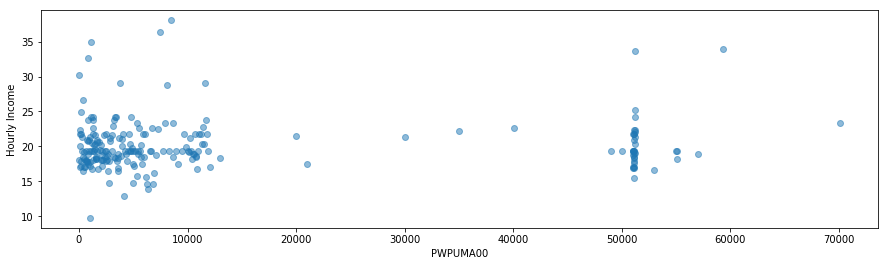

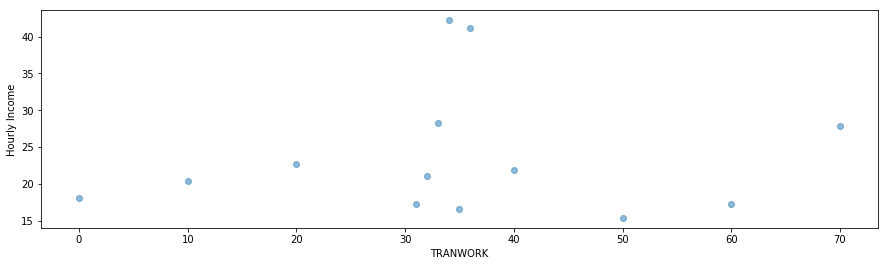

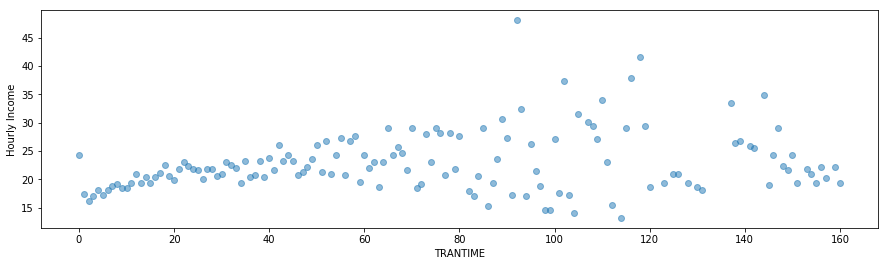

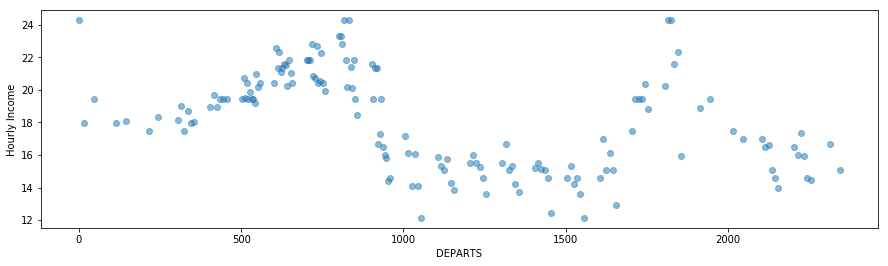

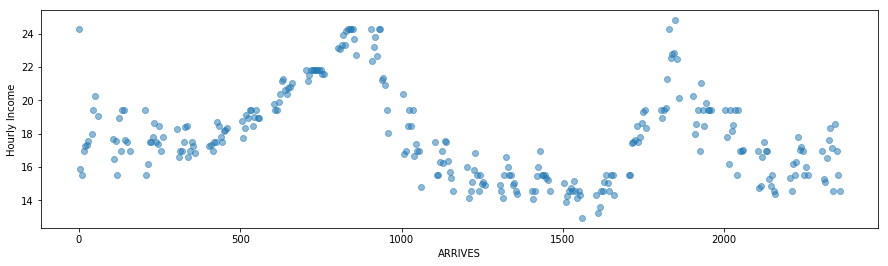

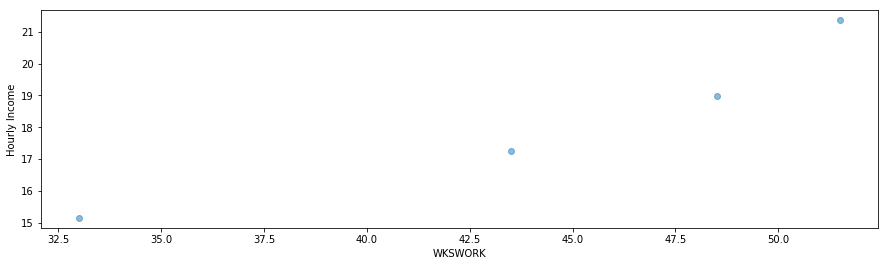

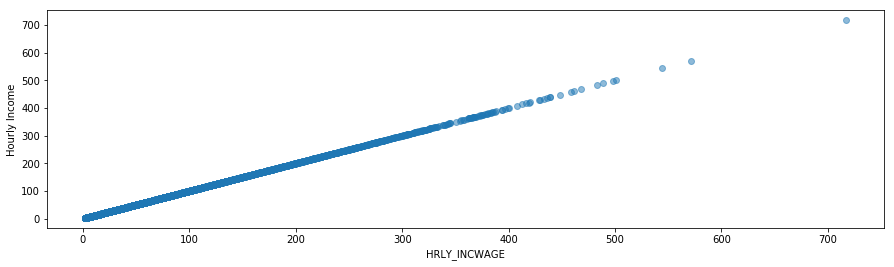

In [27]:
for i in range(len(work_force.columns)):
    fig, ax = plt.subplots(figsize=(15,4))
    name = work_force.columns[i]
    grouped = work_force.groupby(name)
    mean_income_by_group = grouped['HRLY_INCWAGE'].median()
    plt.plot(mean_income_by_group, 'o', alpha=0.5)
    plt.xlabel(name)
    plt.ylabel('Hourly Income');
    plt.pause(0.05)

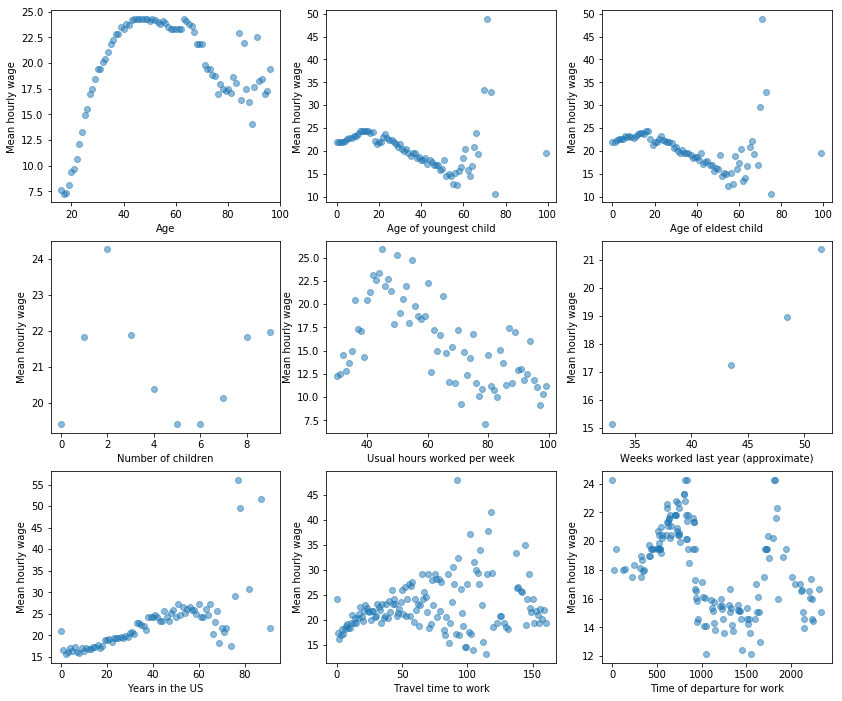

In [29]:
variables = ['AGE', 'YNGCH', 'ELDCH','NCHILD', 'UHRSWORK', 'WKSWORK', 'YRSUSA1', 'TRANTIME', 'DEPARTS']
variables_describe = ['Age', 'Age of youngest child', 'Age of eldest child', 'Number of children', 'Usual hours worked per week', 'Weeks worked last year (approximate)', 'Years in the US', 'Travel time to work', 'Time of departure for work']

fig, axarr = plt.subplots(3, 3, figsize=(14,12))
for i in range(3):
    for j in range(3):
        grouped = work_force.groupby(variables[i * 3 + j])
        mean_income_by_group = grouped['HRLY_INCWAGE'].median()
        axarr[i, j].plot(mean_income_by_group, 'o', alpha=0.5)
        axarr[i, j].set(ylabel='Mean hourly wage', xlabel=variables_describe[i * 3 + j])

In [34]:
work_force_pow4 = work_force.copy()
for var in variables:
    for power in '234':
        work_force_pow4[var+power] = work_force_pow4[var]**int(power)
        
work_force_pow4.head()

,YEAR,DATANUM,SERIAL,CBSERIAL,HHWT,REGION,STATEICP,STATEFIP,COUNTYICP,COUNTYFIP,...,WKSWORK4,YRSUSA12,YRSUSA13,YRSUSA14,TRANTIME2,TRANTIME3,TRANTIME4,DEPARTS2,DEPARTS3,DEPARTS4
1,2017,1,2,2017000000031,45,32,41,1,0,0,...,7.034430e+06,0,0,0,2500,125000,6250000,412164,264609288,169879162896
2,2017,1,3,2017000000061,136,32,41,1,0,0,...,7.034430e+06,0,0,0,2025,91125,4100625,3258025,5880735125,10614726900625
5,2017,1,4,2017000000158,19,32,41,1,0,0,...,7.034430e+06,0,0,0,625,15625,390625,514089,368601813,264287499921
10,2017,1,5,2017000000159,21,32,41,1,0,0,...,7.034430e+06,289,4913,83521,3600,216000,12960000,362404,218167208,131336659216
11,2017,1,5,2017000000159,21,32,41,1,0,0,...,7.034430e+06,0,0,0,7225,614125,52200625,492804,345948408,242855782416


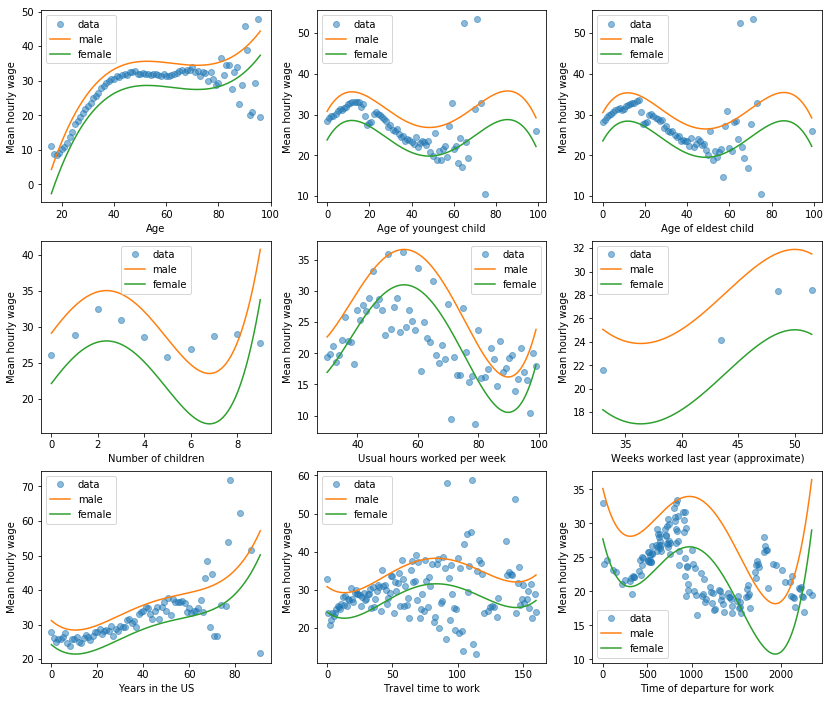

In [35]:
fig, axarr = plt.subplots(3, 3, figsize=(14,12))
for i in range(3):
    for j in range(3):
        col = variables[i * 3 + j]
        # Plot data
        grouped = work_force_pow4.groupby(col)
        mean_income_by_group = grouped['HRLY_INCWAGE'].mean()
        axarr[i, j].plot(mean_income_by_group, 'o', alpha=0.5, label='data')
        axarr[i, j].set(ylabel='Mean hourly wage', xlabel=variables_describe[i * 3 + j])
        
        # Plot predicted male and female
        formula = 'HRLY_INCWAGE ~ C(SEX) + '
        for name in variables:
            formula += col + ' + '
            formula += col + '2 + '
            formula += col + '3 + '
            formula += col + '4 + '
        model = smf.ols(formula[:-3], data=work_force_pow4)
        results = model.fit()
        
        df = pd.DataFrame()
        df[col] = np.linspace(work_force_pow4[col].min(), work_force_pow4[col].max(), len(work_force_pow4[col]))
        df[col+'2'] = df[col]**2
        df[col+'3'] = df[col]**3
        df[col+'4'] = df[col]**4
        
        df['SEX'] = 1
        pred = results.predict(df)
        axarr[i, j].plot(df[col], pred, label='male')
        
        df['SEX'] = 0
        pred = results.predict(df)
        axarr[i, j].plot(df[col], pred, label='female') 
        axarr[i, j].legend();

## People with Disabilities

1 = Does not have a disability

2 = Have a disability

In [204]:
diff_vars = ['DIFFHEAR', 'DIFFEYE', 'DIFFPHYS', 'DIFFCARE', 'DIFFMOB', 'DIFFREM']
diff_vars_describe = ['Hearing difficulty', 'Vision difficulty', 'Ambulatory difficulty', 'Self-care difficulty', 'Independent living difficulty', 'Cognitive difficulty']

In [205]:
diff_df = work_force[["HRLY_INCWAGE"]].copy()
not_disables = work_force.copy()
for col in diff_vars:
    not_disables = not_disables[not_disables[col] == 1]
    
diff_df["Non-disables"] = not_disables["HRLY_INCWAGE"]

In [206]:
for i in range(len(diff_vars)):
    disables = work_force.copy()
    disables = disables[disables[diff_vars[i]] == 2]
    diff_df[diff_vars_describe[i]] = disables["HRLY_INCWAGE"]

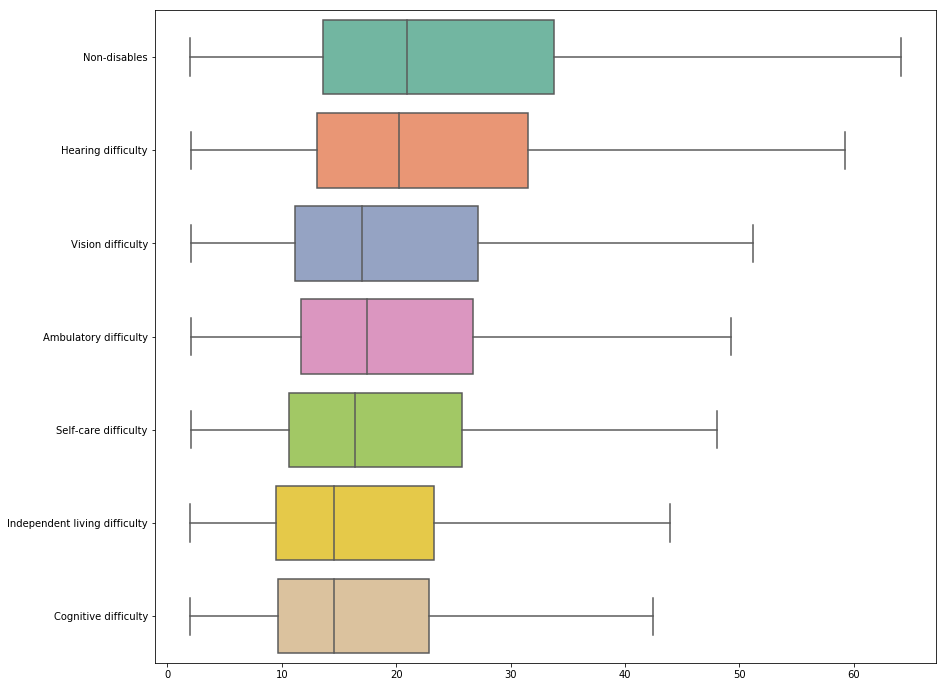

In [211]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(14,12))
ax = sns.boxplot(data=diff_df.drop(["HRLY_INCWAGE"], axis=1), orient="h", palette="Set2", showfliers=False)